# **HW2**
## Question1

# Import necessary packages, and read in data

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [48]:
!pwd

/Users/qing/Desktop/study/data science/HW/hw2


In [49]:
'''The line below is not code, please make it into code by putting in full path'''
path = '/Users/qing/Desktop/study/data science/HW/hw2'

In [50]:
df = pd.read_csv(f'{path}/Titanic_full.csv')
print(df.shape)
df.head(2)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# 2. Preprocessing data and apriori feature selection

In the broadest sense of the term, preprocessing can also include feature selection. Here, we will use our
rationale to feature select. What do the column names mean, does it make sense to what we are trying to do, and should we keep it or drop it?

There are different ways to think about it. For now, let's drop Name, Cabin and Ticket columns.

Let's see if this makes a difference.

In [51]:
'''Keep aside test data first'''

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


df_trn_val,df_tst = mydf_splitter(df,1150)

print(df_trn_val.shape,df_tst.shape)

(1150, 12) (159, 12)


In [52]:
 df_trn_val1 = df_trn_val.drop(["Name","Cabin","Ticket"],axis = 1)
print(df_trn_val1.shape)
df_trn_val1.head(3)

(1150, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


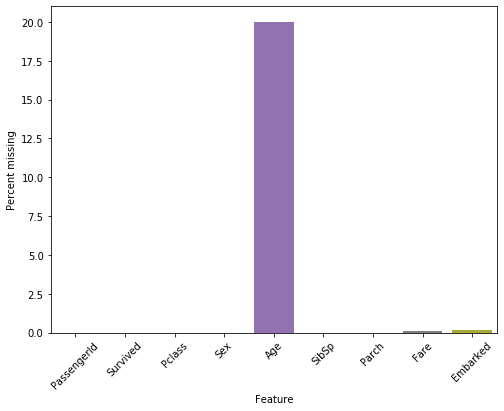

In [53]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df_trn_val1.isnull().sum()/len(df_trn_val1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [54]:
#Define a function to convert object types and string types to category type
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [55]:
# knn impute
def mydf_preprocessor_knn(my_df):
    res = KNN(k=3).fit_transform(my_df)
    return res

# soft impute
def mydf_preprocessor_soft(my_df):
    my_df_normalized = BiScaler().fit_transform(my_df)
    res = SoftImpute().fit_transform(my_df_normalized)
    return res

In [56]:
df_trn_val2 = str_to_cat(df_trn_val1)
print(df_trn_val2.shape)
df_trn_val2.head(2)

(1150, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [62]:
# after knn impute
df_trn_val_knn = mydf_preprocessor_knn(df_trn_val2)


# after soft impute
df_trn_val_soft = mydf_preprocessor_soft(df_trn_val2)


In [ ]:
# knn impute
x1 = df_trn_val_knn.drop('Survived', axis=1)
y1 = df_trn_val_knn['Survived']

x_trn_knn, x_val_knn, y_trn_knn, y_val_knn = train_test_split(x1, y1, random_state=1)


In [ ]:
# soft impute
x2 = df_trn_val_soft.drop('Survived', axis=1)
y2 = df_trn_val_soft['Survived']

x_trn_soft, x_val_soft, y_trn_soft, y_val_soft = train_test_split(x2, y2, random_state=1)


# Random Forest: model training, tuning, and evaluation

In [36]:
# soft impute
mod_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_1.fit(x_trn_soft,y_trn_soft)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [35]:
y_prd1 = mod_1.predict(x_val_soft)
accuracy_score(y_val_soft,y_prd1)

0.7430555555555556

In [22]:
# knn impute
mod_2 = RandomForestClassifier(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_2.fit(x_trn_knn,y_trn_knn)
y_prd2 = mod_2.predict(x_val_knn)
accuracy_score(y_val_knn,y_prd2)

0.7534722222222222

# 4.  Testing it out!

In [39]:
'''Preprocess test set exactly like the train and validation sets'''

df_tst1 = df_tst.drop(["Name","Cabin","Ticket"],axis = 1)
print(df_tst1.shape)
df_tst1.head(3)

(159, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1150,1151,1,3,male,21.0,0,0,7.7750,S
1151,1152,0,3,male,36.5,1,0,17.4000,S
1152,1153,1,3,male,21.0,0,0,7.8542,S


In [40]:
df_tst2 = str_to_cat(df_tst1)
df_tst2.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [26]:
# knn impute
df_tst2 = mydf_preprocessor_knn(df_tst1)


(159, 11)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_na,Fare_na
1150,1151,1,3,2,21.0,0,0,7.7750,3,False,False
1151,1152,0,3,2,36.5,1,0,17.4000,3,False,False
1152,1153,1,3,2,21.0,0,0,7.8542,3,False,False


In [45]:
# Now, let's split out the X and Y variables (vertical split of the dataframe)
#Remember we did this previously!


y_tst = df_tst2["Survived"]
x_tst = df_tst2.drop(["Survived"],axis = 1)
print(x_tst.shape,y_tst.shape)

(159, 8) (159,)


In [28]:
y_prd_tst = mod_1.predict(x_tst)
accuracy_score(y_tst,y_prd_tst)

0.5849056603773585

In [ ]:
# soft impute
df_tst3 = mydf_preprocessor_soft(df_tst1)

y_tst2 = df_tst3["Survived"]
x_tst2 = df_tst3.drop(["Survived"],axis = 1)

y_prd_tst2 = mod_1.predict(x_tst)
accuracy_score(y_tst2,y_prd_tst2)

## Question2

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data
Boosting: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

*diffence*:
While the training stage is parallel for Bagging (i.e., each model is built independently), Boosting builds the new learner in a sequential way

In [ ]:
# Gradient Boosting model
mod_3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                    max_depth=1, random_state=0).fit(x_trn_soft,y_trn_soft)
y_prd3 = mod_3.predict(x_val_soft)
accuracy_score(y_val_soft,y_prd3)


In [ ]:
# Test
df_tst3 = mydf_preprocessor_soft(df_tst1)

y_tst3 = df_tst3["Survived"]
x_tst3 = df_tst3.drop(["Survived"],axis = 1)

y_prd_tst3 = mod_3.predict(x_tst)
accuracy_score(y_tst3,y_prd_tst3)

## Question3

loop with n_estimators

In [ ]:
for n in range(90, 120): 
    mod_n_estimators = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0,
                                    max_depth=1, random_state=0).fit(x_trn_soft,y_trn_soft)
    y_prd4 = mod_n_estimators.predict(x_val_soft)
    print(accuracy_score(y_val_soft,y_prd4))

## Question4
still use Titanic Survivors dataset

In [ ]:
# how to get the feature importance:
# train with random forest 
mod_4 = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 50,
                                   max_depth = 40000,min_samples_leaf = 25).fit(x_trn_soft,y_trn_soft)

# display the relative importance of each attribute
importances = mod4.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(x_trn_soft)), reverse=True)
print (sorted_feature_importance)